# Plot defect backlogs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
%matplotlib inline

## Load a backlog

In [5]:
backlog = pd.read_csv('data/Kernel/IO_Storage/kernel_io_storage_backlog.csv', 
                      parse_dates=['from_date', 'to_date'], index_col=0)

## Plot backlog

In [27]:
def plot_project_sequence(project_sequence, title=None, figsize=(16, 7), title_font_size=20,
                     axis_font_size=18, axis_x_dates=False,
                     xlabel="week", ylabel="#defects",
                     xtick_interval=50, ytick_interval=10):

    fig = plt.figure()
    project_sequence.plot(title=title, figsize=figsize, grid=True, linewidth=2, color="black")

    fig.axes[0].axes.title.set_fontsize(title_font_size)
    if title is not None:
        plt.title(title)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)

    if axis_x_dates:
        plt.xticks(rotation=90)
        plt.xticks([x for x in range(0, len(project_sequence), xtick_interval)],
                   project_sequence.index.tolist())    
    else:
        plt.xticks([x for x in range(0, len(project_sequence), xtick_interval)],
                   [x for x in range(0, len(project_sequence), xtick_interval)])

    max_value = int(np.max(project_sequence))

    fig.axes[0].set_ylim(ymin=0, ymax=max_value)
    plt.yticks([x for x in np.arange(0, max_value, ytick_interval)],
               [int(x) for x in np.arange(0, max_value, ytick_interval)])

    return fig

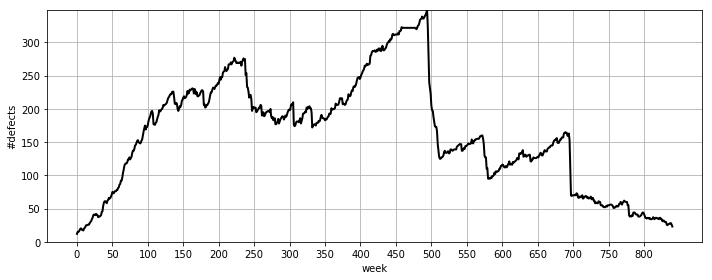

In [28]:
fig = plot_project_sequence(backlog.backlog_all, figsize=(10, 4), 
                           ytick_interval=50)
plt.tight_layout()
#plt.savefig('./test.pdf')
plt.show()
plt.close()

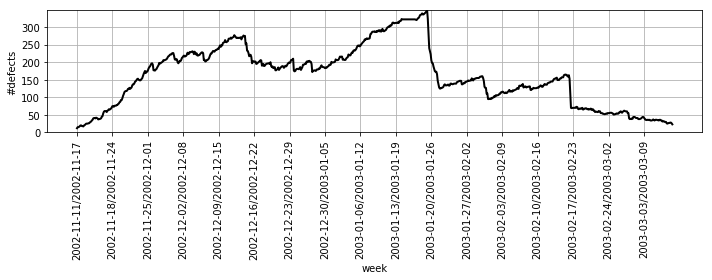

In [29]:
fig = plot_project_sequence(backlog.backlog_all, figsize=(10, 4), 
                           ytick_interval=50, axis_x_dates=True)
plt.tight_layout()
#plt.savefig('./test.pdf')
plt.show()
plt.close()